# Linear Algebra

In [23]:
using LinearAlgebra
using SparseArrays
using Images 
using MAT

## 1. Basics

In [24]:
A = rand(8, 8); # create a random matrix 8x8

Atranspose = A'; # matrix transpose

B = A * Atranspose; # matrix multiplication

In [25]:
b = rand(8); # random 8-dimensional vector 

x = A\b; # solve a linear system

norm(A*x - b)

2.830524433501838e-16

### Types

Regarding the types of each variable:

In [26]:
@show typeof(A)
@show typeof(Atranspose)
@show typeof(B)
@show typeof(b)
@show typeof(x);

typeof(A) = Array{Float64,2}
typeof(Atranspose) = Adjoint{Float64,Array{Float64,2}}
typeof(B) = Array{Float64,2}
typeof(b) = Array{Float64,1}
typeof(x) = Array{Float64,1}


In [27]:
@show Matrix{Float64} == Array{Float64, 2}
@show Matrix <: Array
@show Array <: Matrix;

Matrix{Float64} == Array{Float64, 2} = true
Matrix <: Array = true
Array <: Matrix = false


In [28]:
@show Vector{Float64} == Array{Float64, 1}
@show Vector <: Array
@show Array <: Vector;

Vector{Float64} == Array{Float64, 1} = true
Vector <: Array = true
Array <: Vector = false


### Sizes

The function **sizeof** provides us with the size of an object in bytes.

In [29]:
@show sizeof(Float64) 
@show sizeof(b)
@show sizeof(A);

sizeof(Float64) = 8
sizeof(b) = 64
sizeof(A) = 512


The function **size** provides the dimensions of an array (vector, matrix).

In [30]:
@show size(A)
@show size(b);

size(A) = (8, 8)
size(b) = (8,)


In [31]:
sizeof(A) == (size(A)[1] * size(A)[2] * sizeof(Float64))

true

## 2. Factorizations

### LU factorization

L\*U = P*A

In [32]:
luA = lu(A)

LU{Float64,Array{Float64,2}}
L factor:
8×8 Array{Float64,2}:
 1.0         0.0         0.0       …   0.0       0.0       0.0        0.0
 0.865298    1.0         0.0           0.0       0.0       0.0        0.0
 0.65608     0.830906    1.0           0.0       0.0       0.0        0.0
 0.569803    0.531721   -0.187689      0.0       0.0       0.0        0.0
 0.697817    0.328563   -0.221829      1.0       0.0       0.0        0.0
 0.0388983   0.558554    0.900978  …   0.859278  1.0       0.0        0.0
 0.566844    0.0906684   0.903756     -0.85717   0.587248  1.0        0.0
 0.497772   -0.216316    0.488917      0.254021  0.796237  0.0741127  1.0
U factor:
8×8 Array{Float64,2}:
 0.802463  0.303143  0.492612  …   0.31316    0.214802    0.523365
 0.0       0.681972  0.223811      0.44232   -0.0503942   0.0355565
 0.0       0.0       0.441385     -0.413331   0.229428    0.598507
 0.0       0.0       0.0           0.336815   0.442259    0.671941
 0.0       0.0       0.0          -0.204013   

In [33]:
L = luA.L; 
U = luA.U;
P = luA.P;

### QR factorization

Q\*R = A

In [34]:
qrA = qr(A)

LinearAlgebra.QRCompactWY{Float64,Array{Float64,2}}
Q factor:
8×8 LinearAlgebra.QRCompactWYQ{Float64,Array{Float64,2}}:
 -0.529894   0.448713    0.0932194  …   0.127016   0.25926      0.631681
 -0.301935  -0.189634    0.296287      -0.539413  -0.133689    -0.158136
 -0.020612  -0.45033    -0.452686      -0.372422   0.00269748   0.422153
 -0.263766   0.404519   -0.319924      -0.297248   0.407371    -0.560841
 -0.347653  -0.401485   -0.39709        0.599127   0.147276    -0.214353
 -0.458516  -0.449221    0.309203   …  -0.128496   0.277438    -0.0380208
 -0.369769   0.0379506   0.283917       0.237258  -0.58319     -0.184653
 -0.300367   0.178416   -0.512203      -0.184634  -0.556939     0.0415654
R factor:
8×8 Array{Float64,2}:
 -1.51438  -1.26163   -1.43311   …  -1.26435    -1.09478   -1.61249
  0.0      -0.814303  -0.453075     -0.468479   -0.234269  -0.778757
  0.0       0.0       -0.680997     -0.376922   -0.543766  -0.430423
  0.0       0.0        0.0          -0.0445364  -0.12869

In [35]:
Q = qrA.Q;
R = qrA.R;

### Cholesky factorization

L\*L' = A 

A needs to be *symmetric positive definite*.

In [36]:
isposdef(A)

false

In [37]:
# cholA = cholesky(A)

In [38]:
# L = cholA.L 
# Lp = cholA.U 

### Automatic factorization

In [39]:
?factorize

search: factorize Factorization factorial



```
factorize(A)
```

Compute a convenient factorization of `A`, based upon the type of the input matrix. `factorize` checks `A` to see if it is symmetric/triangular/etc. if `A` is passed as a generic matrix. `factorize` checks every element of `A` to verify/rule out each property. It will short-circuit as soon as it can rule out symmetry/triangular structure. The return value can be reused for efficient solving of multiple systems. For example: `A=factorize(A); x=A\b; y=A\C`.

| Properties of `A`          | type of factorization                      |
|:-------------------------- |:------------------------------------------ |
| Positive-definite          | Cholesky (see [`cholesky`](@ref))          |
| Dense Symmetric/Hermitian  | Bunch-Kaufman (see [`bunchkaufman`](@ref)) |
| Sparse Symmetric/Hermitian | LDLt (see [`ldlt`](@ref))                  |
| Triangular                 | Triangular                                 |
| Diagonal                   | Diagonal                                   |
| Bidiagonal                 | Bidiagonal                                 |
| Tridiagonal                | LU (see [`lu`](@ref))                      |
| Symmetric real tridiagonal | LDLt (see [`ldlt`](@ref))                  |
| General square             | LU (see [`lu`](@ref))                      |
| General non-square         | QR (see [`qr`](@ref))                      |

If `factorize` is called on a Hermitian positive-definite matrix, for instance, then `factorize` will return a Cholesky factorization.

# Examples

```jldoctest
julia> A = Array(Bidiagonal(fill(1.0, (5, 5)), :U))
5×5 Array{Float64,2}:
 1.0  1.0  0.0  0.0  0.0
 0.0  1.0  1.0  0.0  0.0
 0.0  0.0  1.0  1.0  0.0
 0.0  0.0  0.0  1.0  1.0
 0.0  0.0  0.0  0.0  1.0

julia> factorize(A) # factorize will check to see that A is already factorized
5×5 Bidiagonal{Float64,Array{Float64,1}}:
 1.0  1.0   ⋅    ⋅    ⋅
  ⋅   1.0  1.0   ⋅    ⋅
  ⋅    ⋅   1.0  1.0   ⋅
  ⋅    ⋅    ⋅   1.0  1.0
  ⋅    ⋅    ⋅    ⋅   1.0
```

This returns a `5×5 Bidiagonal{Float64}`, which can now be passed to other linear algebra functions (e.g. eigensolvers) which will use specialized methods for `Bidiagonal` types.


In [40]:
factA = factorize(A)

LU{Float64,Array{Float64,2}}
L factor:
8×8 Array{Float64,2}:
 1.0         0.0         0.0       …   0.0       0.0       0.0        0.0
 0.865298    1.0         0.0           0.0       0.0       0.0        0.0
 0.65608     0.830906    1.0           0.0       0.0       0.0        0.0
 0.569803    0.531721   -0.187689      0.0       0.0       0.0        0.0
 0.697817    0.328563   -0.221829      1.0       0.0       0.0        0.0
 0.0388983   0.558554    0.900978  …   0.859278  1.0       0.0        0.0
 0.566844    0.0906684   0.903756     -0.85717   0.587248  1.0        0.0
 0.497772   -0.216316    0.488917      0.254021  0.796237  0.0741127  1.0
U factor:
8×8 Array{Float64,2}:
 0.802463  0.303143  0.492612  …   0.31316    0.214802    0.523365
 0.0       0.681972  0.223811      0.44232   -0.0503942   0.0355565
 0.0       0.0       0.441385     -0.413331   0.229428    0.598507
 0.0       0.0       0.0           0.336815   0.442259    0.671941
 0.0       0.0       0.0          -0.204013   

## 3.Diagonal matrices

In [41]:
?diagm

search: diagm spdiagm diag diagind Diagonal isdiag Bidiagonal Tridiagonal



```
diagm(kv::Pair{<:Integer,<:AbstractVector}...)
diagm(m::Integer, n::Integer, kv::Pair{<:Integer,<:AbstractVector}...)
```

Construct a matrix from `Pair`s of diagonals and vectors. Vector `kv.second` will be placed on the `kv.first` diagonal. By default the matrix is square and its size is inferred from `kv`, but a non-square size `m`×`n` (padded with zeros as needed) can be specified by passing `m,n` as the first arguments.

`diagm` constructs a full matrix; if you want storage-efficient versions with fast arithmetic, see [`Diagonal`](@ref), [`Bidiagonal`](@ref) [`Tridiagonal`](@ref) and [`SymTridiagonal`](@ref).

# Examples

```jldoctest
julia> diagm(1 => [1,2,3])
4×4 Array{Int64,2}:
 0  1  0  0
 0  0  2  0
 0  0  0  3
 0  0  0  0

julia> diagm(1 => [1,2,3], -1 => [4,5])
4×4 Array{Int64,2}:
 0  1  0  0
 4  0  2  0
 0  5  0  3
 0  0  0  0
```

---

```
diagm(v::AbstractVector)
diagm(m::Integer, n::Integer, v::AbstractVector)
```

Construct a matrix with elements of the vector as diagonal elements. By default (if `size=nothing`), the matrix is square and its size is given by `length(v)`, but a non-square size `m`×`n` can be specified by passing `m,n` as the first arguments.

# Examples

```jldoctest
julia> diagm([1,2,3])
3×3 Array{Int64,2}:
 1  0  0
 0  2  0
 0  0  3
```


In [43]:
Diagonal([1,2,3])

3×3 Diagonal{Int64,Array{Int64,1}}:
 1  ⋅  ⋅
 ⋅  2  ⋅
 ⋅  ⋅  3

In [44]:
A = [3 4 5; 
     6 7 8;
     9 10 11]

Diagonal(A)

3×3 Diagonal{Int64,Array{Int64,1}}:
 3  ⋅   ⋅
 ⋅  7   ⋅
 ⋅  ⋅  11

In [45]:
I(4)

4×4 Diagonal{Bool,Array{Bool,1}}:
 1  ⋅  ⋅  ⋅
 ⋅  1  ⋅  ⋅
 ⋅  ⋅  1  ⋅
 ⋅  ⋅  ⋅  1

## 4. Sparse Linear Algebra

Sparse matrices are stored in Compressed Sparse Column (CSC) form.  

We can generate a random sparse matrix using the **sprand** function.

In [53]:
m = 5 # number of rows
n = 5 # number of columns
p = 2/5 # probability of any element of being nonzero

S = sprand(m, n, p)

5×5 SparseMatrixCSC{Float64,Int64} with 9 stored entries:
  [1, 1]  =  0.4775
  [5, 1]  =  0.600623
  [1, 2]  =  0.256187
  [4, 2]  =  0.156979
  [5, 2]  =  0.43057
  [3, 3]  =  0.391414
  [5, 3]  =  0.121196
  [2, 4]  =  0.755729
  [3, 5]  =  0.718846

In order to conver it to a matrix

In [54]:
Matrix(S)

5×5 Array{Float64,2}:
 0.4775    0.256187  0.0       0.0       0.0
 0.0       0.0       0.0       0.755729  0.0
 0.0       0.0       0.391414  0.0       0.718846
 0.0       0.156979  0.0       0.0       0.0
 0.600623  0.43057   0.121196  0.0       0.0

## 5. Images as matrices

To load an images we just use the function **load** (once the *ImageMagick* package is installed).

┌ Info: Precompiling ImageMagick [6218d12a-5da1-5696-b52f-db25d2ecc6d1]
└ @ Base loading.jl:1260


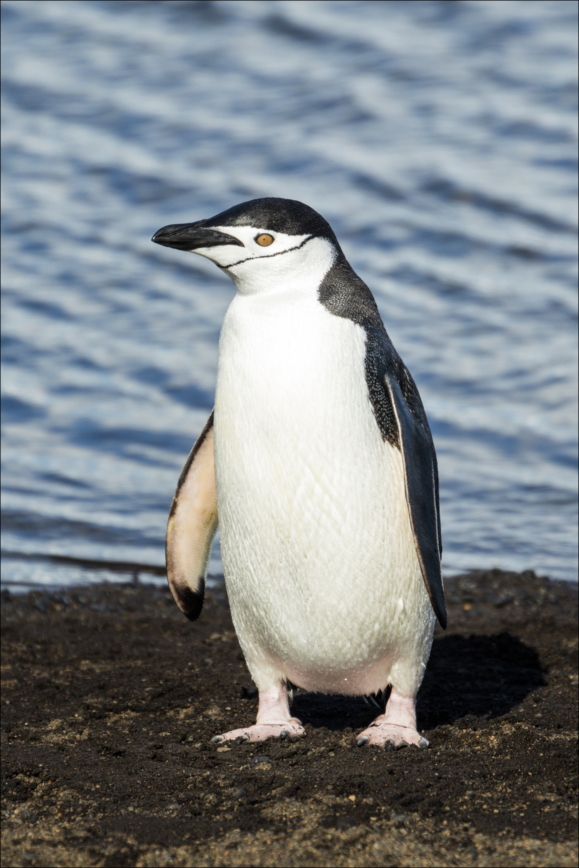

In [56]:
X1 = load("data/penguin.jpg")

In [60]:
@show typeof(X1)
@show size(X1)
X1[50,50]

typeof(X1) = Array{RGB{Normed{UInt8,8}},2}
size(X1) = (3468, 2312)


We can convert the image to a gray scale

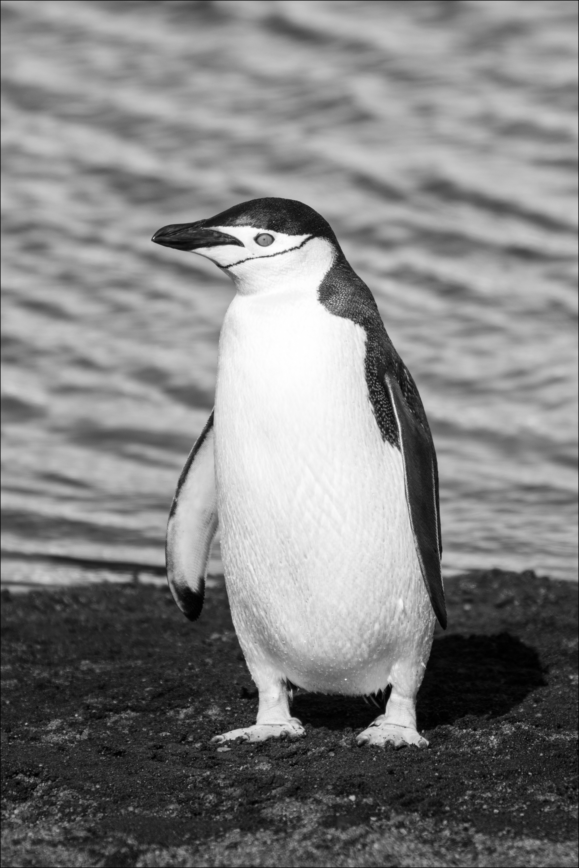

In [61]:
Xgray = Gray.(X1)

We can extract the RGB layers as follows.

In [68]:
R = map(i->X1[i].r, 1:length(X1));
R = Float64.(reshape(R, size(X1)...));

G = map(i->X1[i].g, 1:length(X1));
G = Float64.(reshape(G, size(X1)...));

B = map(i->X1[i].b, 1:length(X1));
B = Float64.(reshape(B, size(X1)...));

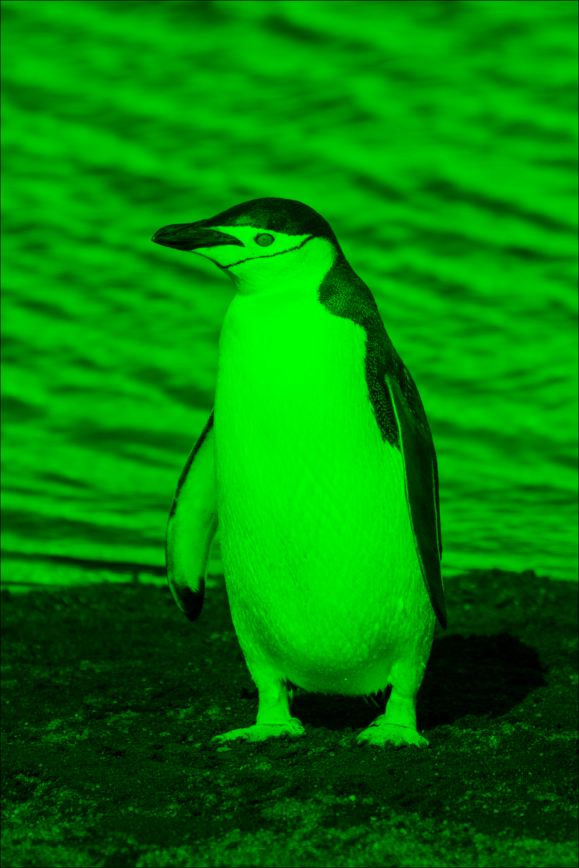

In [72]:
Z = zeros(size(R)...);
RGB.(Z, G, Z)